# Market regimes

This notebook illustrates several **GBM market scenarios** and their parameterization.

## Singular GBM regimes

Paths are normalized and shown on a log scale. The **mean** follows
$$
\mathbb{E}[S(t)] = S_0\,e^{\mu t},
$$
while the **median (typical) path** follows
$$
\mathrm{median}\,S(t) = S_0\,e^{(\mu-\dfrac{1}{2}\sigma^2)t},
$$
so the median lies **below** the mean (see [GBM derivation](../theory/01_gbm.ipynb)).  
The **10–90% band** shows the middle 80% of paths **at each date** and widens as $\sigma$ increases (greater dispersion).\
Trajectories are created over the span of ten years, where each year includes TDY = 260 trading days.

### Regime table

In [149]:
from mlbt.simulator.regimes import get_GBM_regimes
GBM_REGIMES = get_GBM_regimes(print_table=True)

                 Label     μ     σ  g = μ - 0.5*σ^2
0       Bull - Low Vol  0.08  0.10          0.07500
1      Bull - High Vol  0.08  0.30          0.03500
2   Sideways - Low Vol  0.00  0.10         -0.00500
3  Sideways - High Vol  0.00  0.30         -0.04500
4       Bear - Low Vol -0.05  0.10         -0.05500
5      Bear - High Vol -0.05  0.30         -0.09500
6         Crisis Shock -0.20  0.45         -0.30125


### Regime graphs

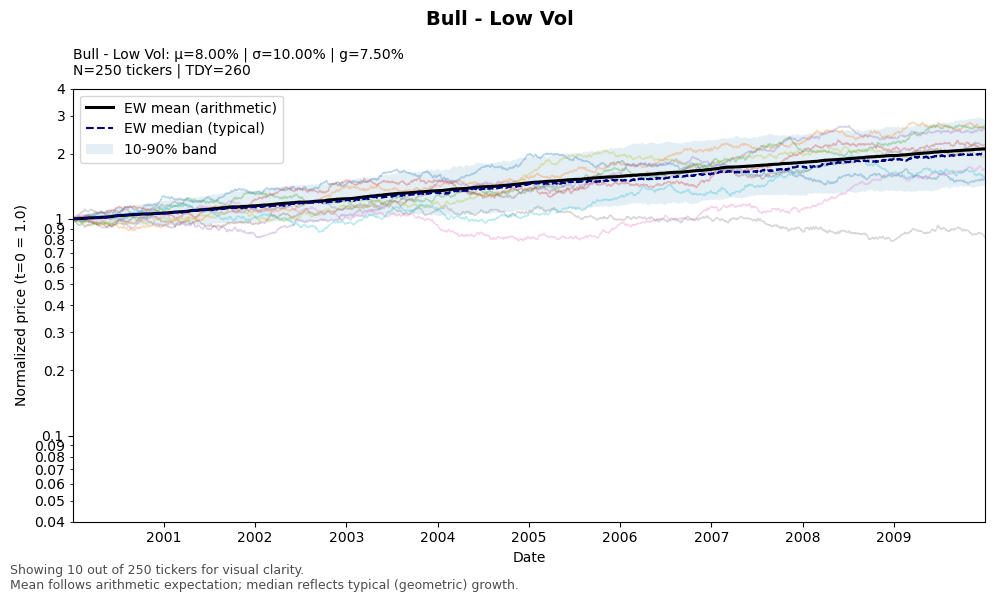

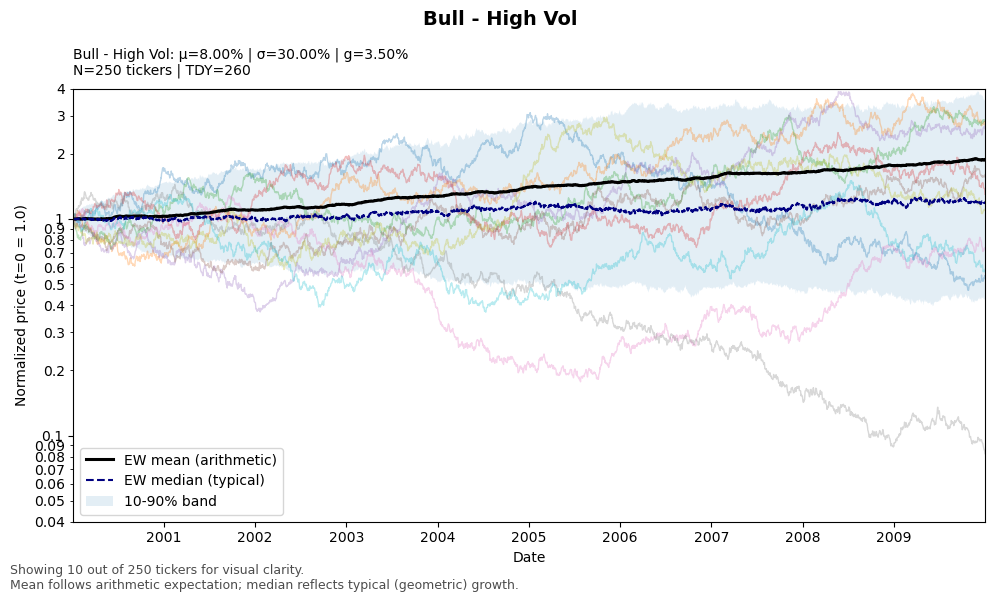

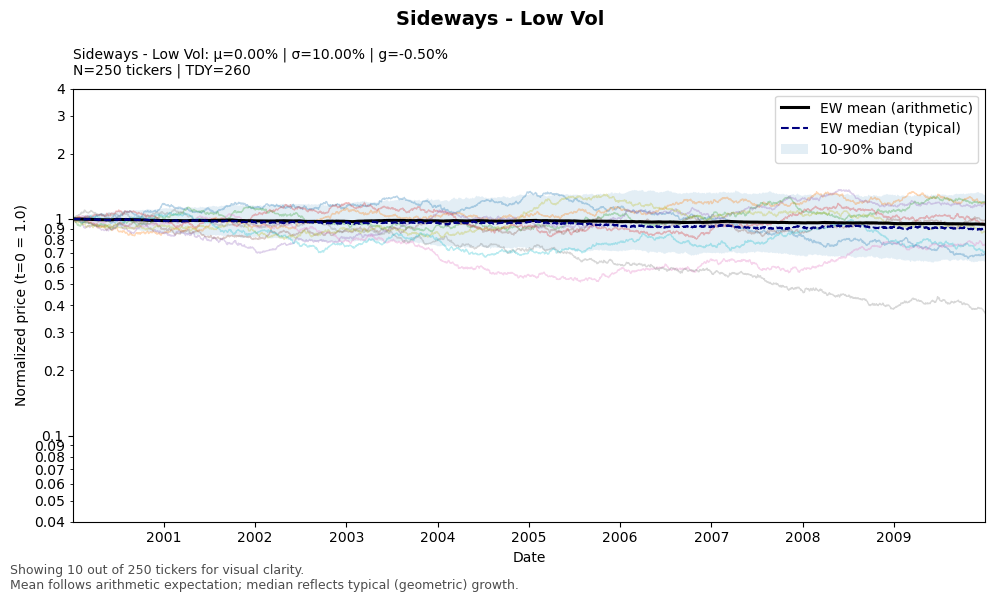

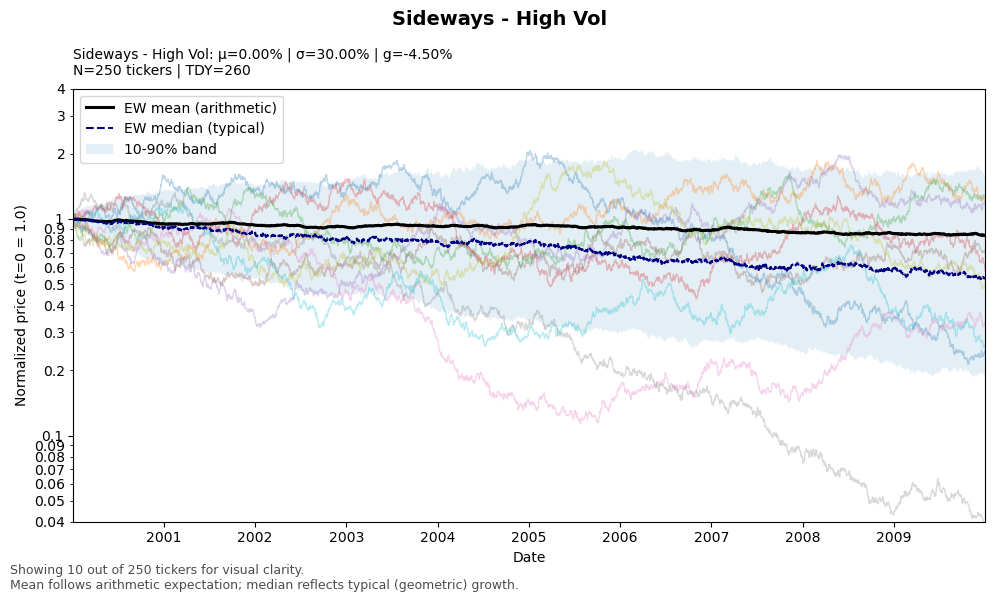

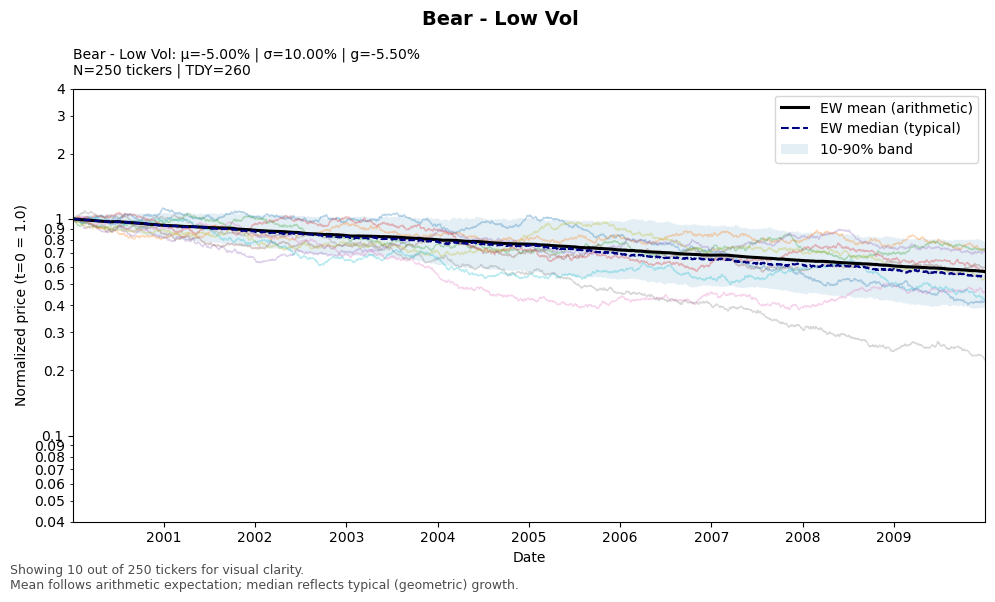

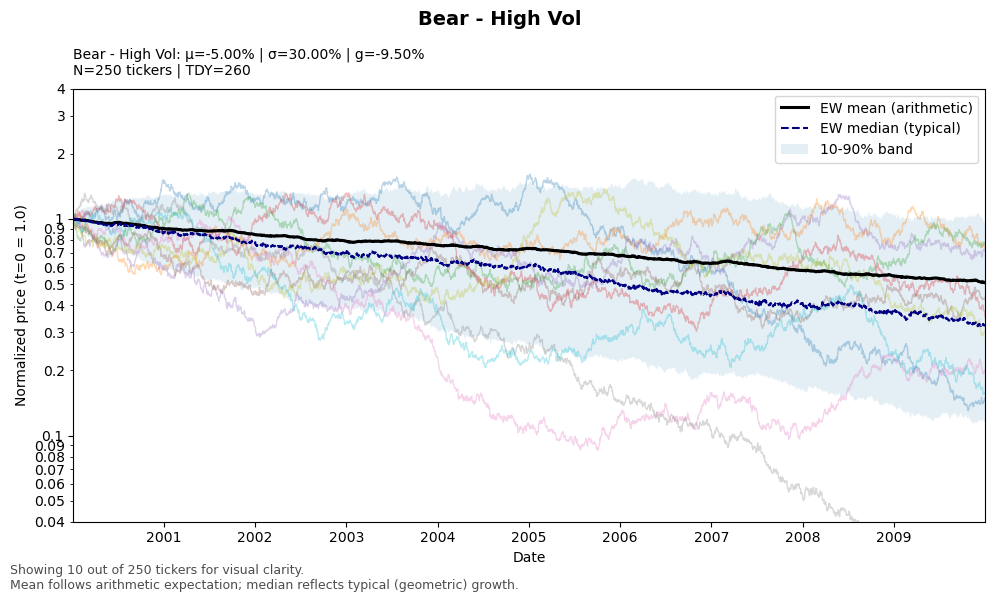

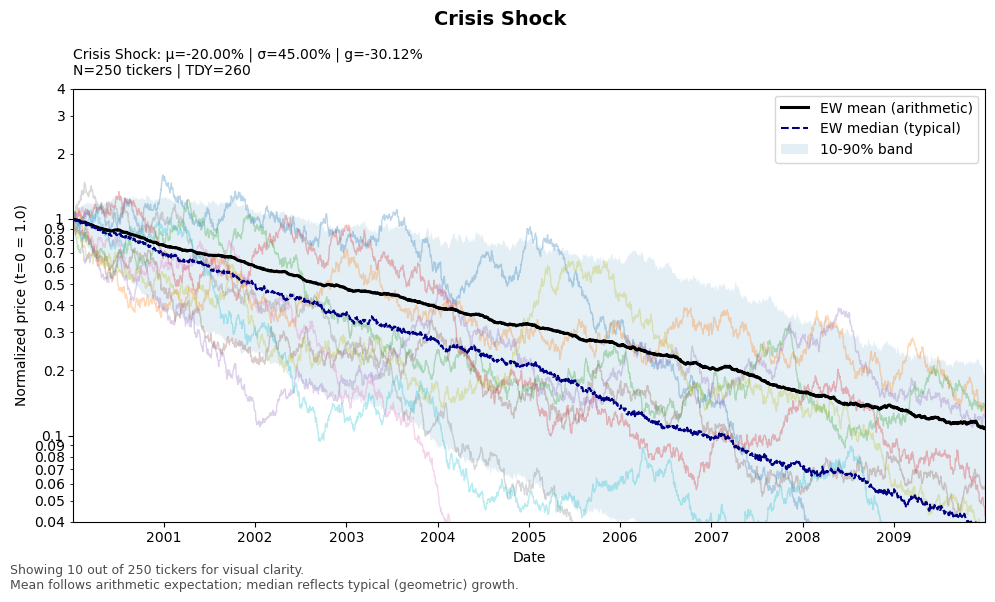

In [150]:
from mlbt.simulator.regimes import notebook_singular_GBM_graphs
notebook_singular_GBM_graphs()

## Mixed GBM regimes

Real markets shift between conditions. We model this by switching $(\mu, \sigma)$ at specified dates to mimic changes in sentiment, liquidity, macro cycles, etc.

In the example below, the market progresses through six stages over the span of ten years (TDY = 260 trading days per year):
1. **Sideways - Low Vol**
2. **Sideways - High Vol**
3. **Bull - High Vol**
4. **Crisis Shock**
5. **Bear - Low Vol**
6. **Bull - Low Vol**

Regimes are indicated by shaded regions; prices are normalized and shown on a log scale.

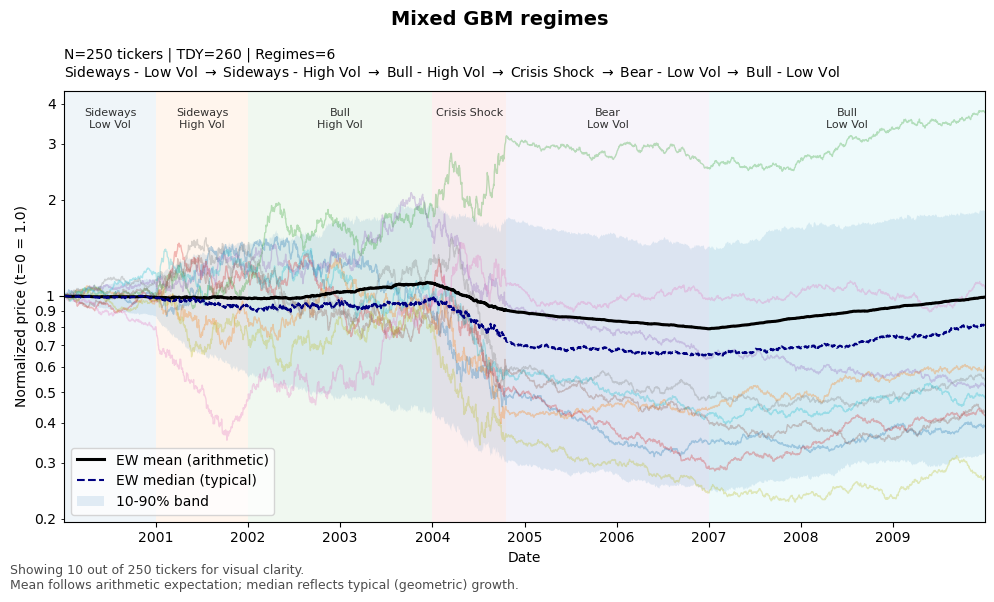

In [151]:
from mlbt.simulator.regimes import notebook_mixed_GBM_graphs
notebook_mixed_GBM_graphs()